In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [ ]:
i = Input(shape=x_train[0].shape)
#x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
#x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
#x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3068 - accuracy: 0.5491 - val_loss: 1.0872 - val_accuracy: 0.6229
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8463 - accuracy: 0.7071 - val_loss: 0.8453 - val_accuracy: 0.7170
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6846 - accuracy: 0.7638 - val_loss: 0.7048 - val_accuracy: 0.7588
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5817 - accuracy: 0.8005 - val_loss: 0.7407 - val_accuracy: 0.7495
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4926 - accuracy: 0.8312 - val_loss: 0.6994 - val_accuracy: 0.7871
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4185 - accuracy: 0.8562 - val_loss: 0.6169 - val_accuracy: 0.7980
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3484 - accuracy: 0.8790 - val_loss: 0.6672 -

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.5460 - accuracy: 0.8259 - val_loss: 0.5099 - val_accuracy: 0.8375
Epoch 2/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.4457 - accuracy: 0.8516 - val_loss: 0.4582 - val_accuracy: 0.8528
Epoch 3/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.4101 - accuracy: 0.8630 - val_loss: 0.4784 - val_accuracy: 0.8431
Epoch 4/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.3891 - accuracy: 0.8698 - val_loss: 0.4561 - val_accuracy: 0.8519
Epoch 5/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.3667 - accuracy: 0.8775 - val_loss: 0.4468 - val_accuracy: 0.8549
Epoch 6/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.3533 - accuracy: 0.8809 - val_loss: 0.4379 - val_accuracy: 0.8588
Epoch 7/50
1562/1562 [==========================

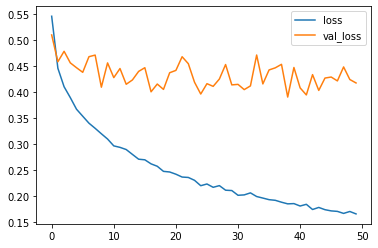

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

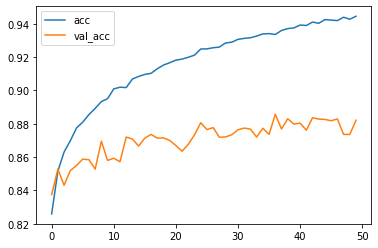

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[912   6  18  11   7   2   2   2  26  14]
 [  2 951   0   1   1   0   1   0  12  32]
 [ 34   1 814  34  45  20  31   9   4   8]
 [ 12   2  26 817  41  37  32  12   5  16]
 [  6   1  14  24 908   9  21  15   2   0]
 [  7   1  15 186  36 721  17  14   0   3]
 [  3   2  18  31  12   4 926   1   2   1]
 [ 10   0   7  20  31  12   3 908   2   7]
 [ 37   6   2   6   1   2   2   1 928  15]
 [ 10  37   1   3   0   1   2   1   9 936]]


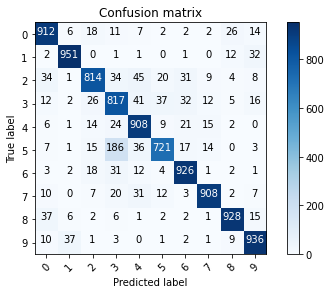

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

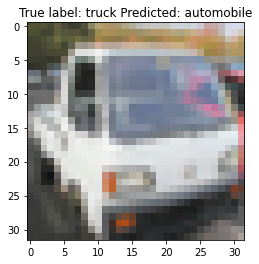

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       